# NEOvisualizer Demo

This notebook provides a quick walk through of NEOvisualizer module.

In [1]:
# Import packages
import pandas as pd
import NEOvisualizer as nv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from importlib import reload
reload(nv)

%matplotlib widget

In [2]:
# Get Data
filename = 'NEOdata.csv'
df = pd.read_csv(filename)

In [3]:
# construct NEO objects and hold them in a list (or other iterable data structures)
objList = []
for i in range(20):
    objList.append(nv.NEOvisualizer(df.iloc[i]))

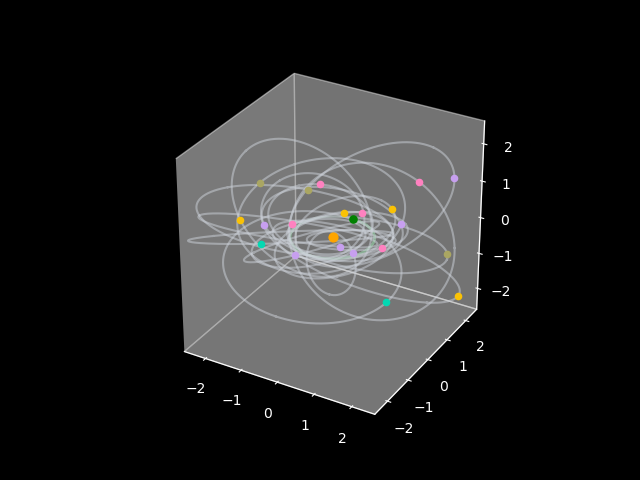

In [4]:
# open a figure
plt.close('all') # close other open figures
plt.style.use('dark_background')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # new figure

# set figure axis scales and aspects -- manually adjust for each object's semimajor axis
radius = 5.0
ax.set_xlim3d(-radius/2,radius/2)
ax.set_ylim3d(-radius/2,radius/2)
ax.set_zlim3d(-radius/2,radius/2)
ax.set_box_aspect(aspect=(1, 1, 1))
ax.grid(visible=False)
#ax.set_axis_off()

# plot the Sun
ax.scatter(0,0,0, c='orange', s=40)

# plot the Earth
nv.plotEarth(ax)

# plot objects -- use df['full_name'=='(name of NEO)'] to get index to a specific object
for i in range(20):
    objList[i].plotOrbit(ax, True)

# Interactive Plot using ipywidgets

In [5]:
from ipywidgets import interact, fixed, FloatSlider
from astropy.time import Time

In [6]:
today = Time.now()
utc = today.utc
JDTDB = today.tdb.jd

interactive(children=(FloatSlider(value=2.5, description='radius', max=10.0, min=0.1), Output()), _dom_classes…

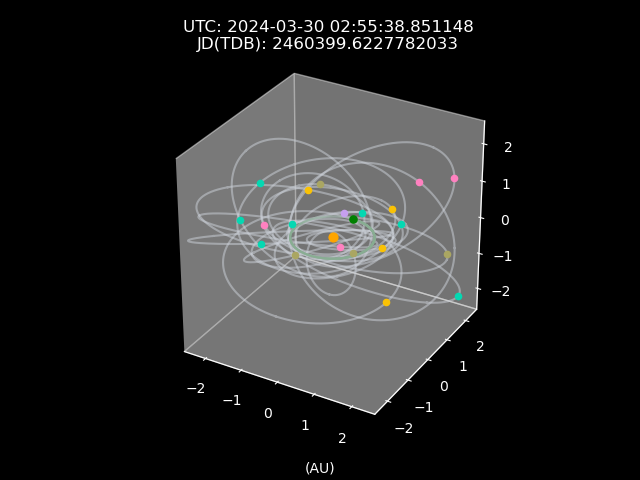

In [7]:
# open a figure
plt.close('all') # close other open figures
plt.style.use('dark_background')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # new figure
ax.grid(visible=False)
ax.set_box_aspect(aspect=(1, 1, 1))
# Title and label
fig.text(0.5,0.01,s='(AU)',ha='center',va='bottom')
ax.set_title("UTC: {}\nJD(TDB): {}".format(utc, JDTDB))
# plot the Sun
ax.scatter(0,0,0, c='orange', s=40)

# plot objects
for i in range(20): # first 200 objects
    objList[i].plotOrbit(ax, True)

    
# Interactive    
def plot(ax, radius):
    ax.set_xlim3d(-radius,radius)
    ax.set_ylim3d(-radius,radius)
    ax.set_zlim3d(-radius,radius)

interact(plot, ax=fixed(ax), radius = FloatSlider(value=2.5, min=0.1, max=10.0, step=0.1))

# plot the Earth
nv.plotEarth(ax)

Colors are randomly assigned at NEOvisualizer object construction.
# How to specify color for NEO position
See the following cell for a walkthrough. Follow similar steps to plot objects at a specified time rather than current time.

interactive(children=(FloatSlider(value=2.5, description='radius', max=10.0, min=0.1), Output()), _dom_classes…

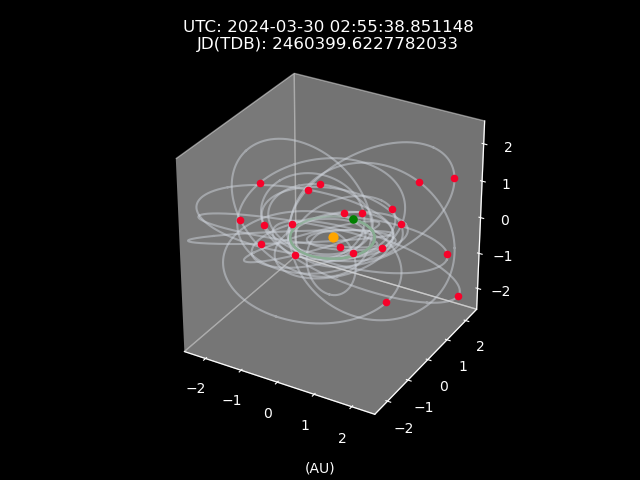

In [8]:
# open a figure
plt.close('all') # close other open figures
plt.style.use('dark_background')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # new figure
ax.grid(visible=False)
ax.set_box_aspect(aspect=(1, 1, 1))
# Title and label
fig.text(0.5,0.01,s='(AU)',ha='center',va='bottom')
ax.set_title("UTC: {}\nJD(TDB): {}".format(utc, JDTDB))
# plot the Sun
ax.scatter(0,0,0, c='orange', s=40)

# Set the specific value of color in consideration, in a format matplotlib can read
myColor = 'xkcd:cherry red'

# plot the first 200 objects
for i in range(20): 
    objList[i].plotOrbit(ax, showNEO=False) # <----- set showNEO to false, when set to true automatically plots NEO with random color
    objList[i].plotNEO(ax, colorStr=myColor) # <----- color string goes second

# Interactive    
def plot(ax, radius):
    ax.set_xlim3d(-radius,radius)
    ax.set_ylim3d(-radius,radius)
    ax.set_zlim3d(-radius,radius)

interact(plot, ax=fixed(ax), radius = FloatSlider(value=2.5, min=0.1, max=10.0, step=0.1))

# plot the Earth
nv.plotEarth(ax)